In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px   # for 3d plots 
import plotly.graph_objs as go
import plotly.offline as py
from sklearn.preprocessing import StandardScaler


Bad key "text.kerning_factor" on line 4 in
C:\Users\Dell\anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


### No of traveller based

Exploration of dataset.

In [2]:
travellerwise=pd.read_csv("Tourism.csv")
travellerwise.head(10)

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,5419608,668403,5663136,794556,4.5,18.9,12.0,6.9
1,Agra Circle,Agra Fort,1799953,441326,2008208,489822,11.6,11.0,11.0,5.0
2,Agra Circle,Akbar's Tomb Sikandara,418502,22389,362070,23638,-13.5,5.6,13.0,12.0
3,Agra Circle,Fatehpur Sikri,427854,126114,962069,301181,124.9,138.8,35.0,37.0
4,Agra Circle,Itimad-ud-Daulah,108392,129177,138524,76572,27.8,-40.7,15.0,9.0
5,Agra Circle,Mehtab Bagh,215845,39969,172790,68897,-19.9,72.4,16.0,10.0
6,Agra Circle,RamBagh,56238,1911,67541,13493,20.1,606.1,12.0,11.0
7,Agra Circle,Mariam's Tomb Sikandara,28026,201,29880,12776,6.6,6256.2,14.0,12.0
8,Aurangabad Circle,Ellora Caves,1255537,24866,1645484,40405,31.1,62.5,36.0,28.0
9,Aurangabad Circle,Bibi-Ka-Maqbara,1291040,18756,1773100,20290,37.3,8.2,13.0,6.5


In [3]:
travellerwise.shape

(115, 10)

In [4]:
travellerwise.columns

Index(['Circle', 'Name of the Monument', 'Domestic - 2016-17',
       'Foreign - 2016-17', 'Domestic - 2017-18', 'Foreign - 2017-18',
       'Domestic Percentage growth - 2017-18/2016-17',
       'Foreign Percentage growth - 2017-18/2016-17', 'Airport(in km)',
       'Railway(in km)'],
      dtype='object')

Here we have dataset of mainly number of travellers incoming to different parts of India both domestic and foreign from 2016 to 2018 with 115 rows(values) and 10 columns. Also we have the information regarding the places like connectivity, the torist spot, growth rate in travellers etc. 

Lets check for null values and if it has if there is any pattern to it. As null or empty values in the dataset might create problem so it is always better to look into it before use.

In [5]:
travellerwise.isnull().sum()

Circle                                          0
Name of the Monument                            0
Domestic - 2016-17                              0
Foreign - 2016-17                               0
Domestic - 2017-18                              0
Foreign - 2017-18                               0
Domestic Percentage growth - 2017-18/2016-17    1
Foreign Percentage growth - 2017-18/2016-17     2
Airport(in km)                                  1
Railway(in km)                                  2
dtype: int64

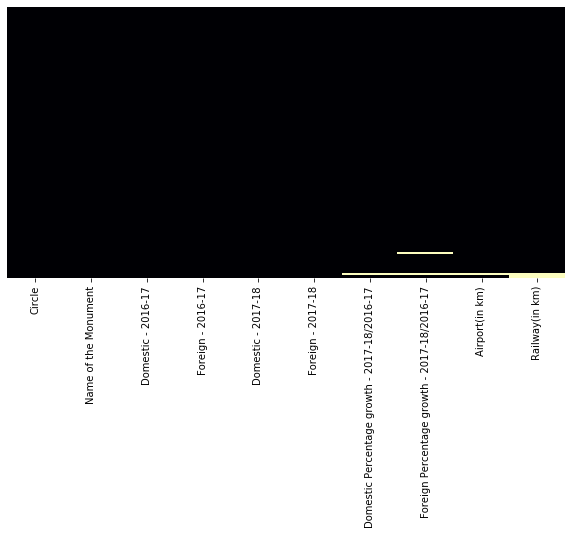

In [6]:
plt.figure(figsize=(10,5)) 
sns.heatmap(travellerwise.isnull(),cmap='magma',yticklabels=False,cbar=False)
plt.show()

There are a very few null values therefore.  They can be removed because we already have sufficient amount of dataset to work with.

In [7]:
df=travellerwise.copy()

In [8]:
df=df.dropna()  

In [9]:
df.shape

(112, 10)

Now we are left with a dataset of 112 rows and 10 columns.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112 entries, 0 to 112
Data columns (total 10 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Circle                                        112 non-null    object 
 1   Name of the Monument                          112 non-null    object 
 2   Domestic - 2016-17                            112 non-null    int64  
 3   Foreign - 2016-17                             112 non-null    int64  
 4   Domestic - 2017-18                            112 non-null    int64  
 5   Foreign - 2017-18                             112 non-null    int64  
 6   Domestic Percentage growth - 2017-18/2016-17  112 non-null    float64
 7   Foreign Percentage growth - 2017-18/2016-17   112 non-null    float64
 8   Airport(in km)                                112 non-null    float64
 9   Railway(in km)                                112 non-null    flo

In [11]:
df.describe()

,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
count,1.120000e+02,112.000000,1.120000e+02,112.000000,112.000000,112.000000,112.000000,112.000000
mean,3.991450e+05,26542.321429,4.759064e+05,32318.883929,48.383036,1297.487500,62.323214,18.895625
std,7.165584e+05,88792.877717,7.810398e+05,100170.832913,101.089579,9978.534996,64.898156,36.450659
min,3.430000e+02,2.000000,6.400000e+01,0.000000,-97.000000,-100.000000,0.300000,0.500000
25%,4.869550e+04,229.500000,7.132100e+04,331.750000,12.950000,19.800000,14.750000,3.000000
50%,1.730935e+05,1405.500000,2.057655e+05,2736.000000,34.550000,42.550000,39.250000,6.700000
75%,3.960450e+05,10658.250000,4.936770e+05,15126.500000,51.400000,68.725000,91.175000,17.075000
max,5.419608e+06,668403.000000,5.663136e+06,794556.000000,678.100000,101485.200000,294.000000,288.000000


In [12]:
print(travellerwise['Circle'].value_counts())

Delhi Circle          10
Mumbai Circle         10
Agra Circle            8
Hyderabad Circle       8
Chennai Circle         7
Bhopal Circle          7
Dharwad Circle         6
Vadodara Circle        6
Aurangabad Circle      6
Bhubaneswar Circle     5
Lucknow Circle         5
Guwahati Circle        5
Patna Circle           5
Sarnath Circle         4
Bengaluru Circle       4
Srinagar Circle        3
Kolkata Circle         3
Chandigarh Circle      2
Thrissur Circle        2
Hampi Mini Circle      2
Shimla Mini Circle     2
Jodhpur Circle         2
Jaipur Circle          1
Raipur Circle          1
Leh Mini Circle        1
Name: Circle, dtype: int64


We have maximum number of tourist spot in Delhi circle and Mumbai circle followed by Agra and Hyderabad circle.

####Data Visualization

Above plot shows that Agra circle has highest intake of both domestic and foreign tourist during 2016-17.

In [13]:
circlewise_df=df.groupby('Circle').sum()

In [14]:
sorted1=circlewise_df.sort_values(by="Domestic - 2016-17")

In [15]:
sorted1.head(5)

,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
Circle,,,,,,,,
Srinagar Circle,29301,52,37815,15052,241.5,30048.0,308.0,21.9
Jaipur Circle,34699,1068,46333,7779,33.5,628.4,91.7,0.5
Raipur Circle,52559,54,91602,72,74.3,33.3,80.0,84.0
Chandigarh Circle,175429,128,229892,272,64.9,225.8,121.3,5.5
Shimla Mini Circle,187361,5048,252019,6103,88.0,47.8,47.0,65.0


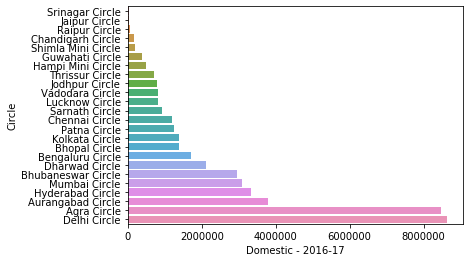

In [16]:
sns.barplot(y=sorted1.index,x="Domestic - 2016-17",data=sorted1)

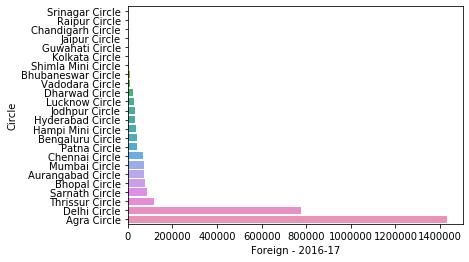

In [17]:
sorted2=circlewise_df.sort_values(by="Foreign - 2016-17")
sns.barplot(y=sorted2.index,x="Foreign - 2016-17",data=sorted2)

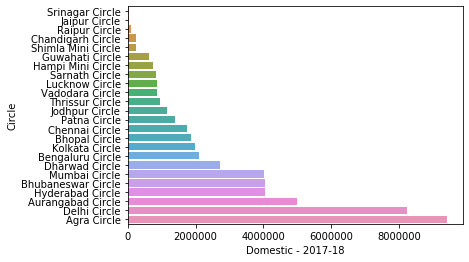

In [18]:
sorted3=circlewise_df.sort_values(by="Domestic - 2017-18")
sns.barplot(y=sorted3.index,x="Domestic - 2017-18",data=sorted3)

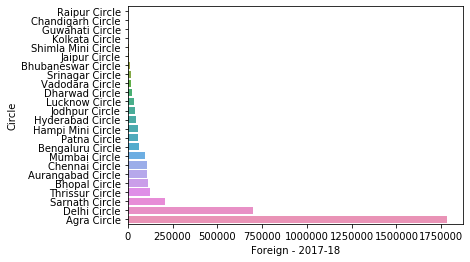

In [19]:
sorted4=circlewise_df.sort_values(by="Foreign - 2017-18")
sns.barplot(y=sorted4.index,x="Foreign - 2017-18",data=sorted4)

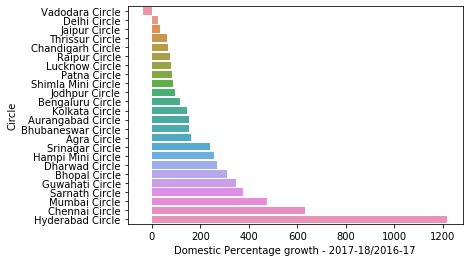

In [20]:
dom_growth=circlewise_df.sort_values(by="Domestic Percentage growth - 2017-18/2016-17")
sns.barplot(y=dom_growth.index,x="Domestic Percentage growth - 2017-18/2016-17",data=dom_growth)

Hydrabad circle has highest increase in the growth of tourist flow followed by Chennai circle. Vadodara circle has shown decrease in tourist flow growth. Also most of the circles have an increased growth rate.

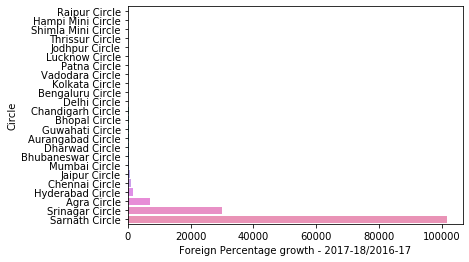

In [21]:
for_growth=circlewise_df.sort_values(by="Foreign Percentage growth - 2017-18/2016-17")
sns.barplot(y=for_growth.index,x="Foreign Percentage growth - 2017-18/2016-17",data=for_growth)

It is seen that most of the circles have very constant flow of tourist in the past two years excep for Sarnath Circle which an tremendous increase in the Foreign tourist flow. 

Below graph represents density of tourist spot according to its distance from railway station and airport.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



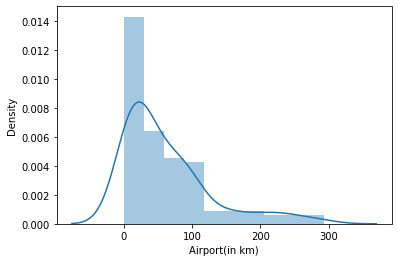

In [22]:
sns.distplot(df["Airport(in km)"])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



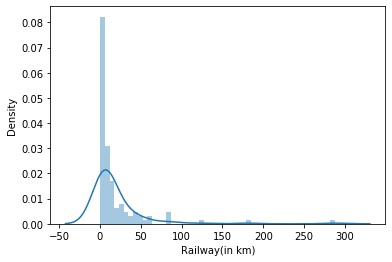

In [23]:
sns.distplot(df["Railway(in km)"])

It is clear from the above graph that more tourist spots have grown which are closer to railway and airport. Connectivity is an important issue to consider.

In [24]:
num_data = df.select_dtypes(exclude='object').columns.tolist()
cat_data = df.select_dtypes(include='object').columns.tolist()

print(num_data)
print(cat_data)

['Domestic - 2016-17', 'Foreign - 2016-17', 'Domestic - 2017-18', 'Foreign - 2017-18', 'Domestic Percentage growth - 2017-18/2016-17', 'Foreign Percentage growth - 2017-18/2016-17', 'Airport(in km)', 'Railway(in km)']
['Circle', 'Name of the Monument']


By taking a look at some of our features we could say that the features are highly skewed and have Positive
Skewness which suggests that there are outliers in our dataset. Large outliers need to be transformed or
removed for clustering purposes.

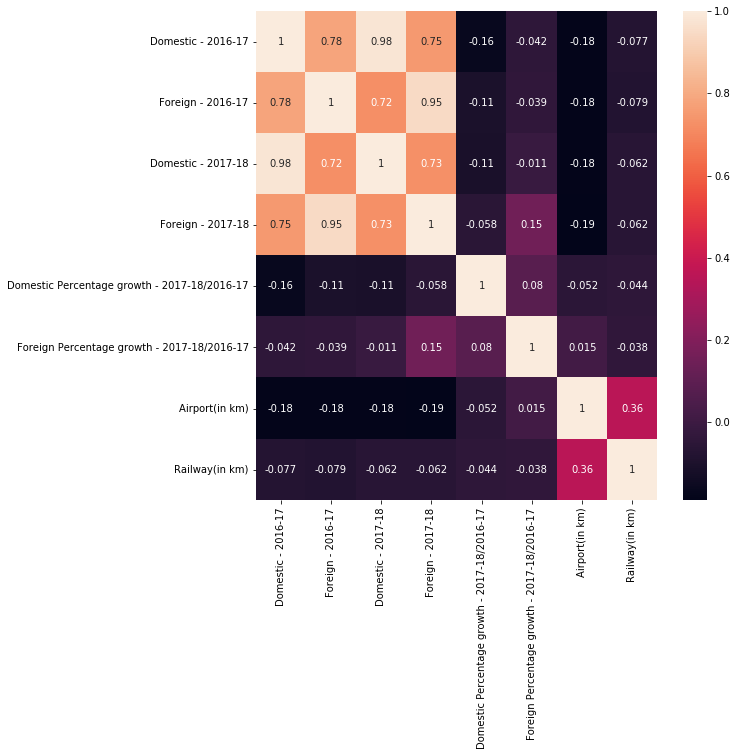

In [25]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

From the Heatmap we see that our two features have a high correlation in between them i.e., between these
features :-
["Domestic - 2016-17" and "Domestic - 2017-18"] and [ "Foreign - 2017-18" and "Foreign - 2016-17"]
So, we will be choosing only one of the features from the above two i.e.,
["Domestic - 2017-18", "Foreign - 2017-18"]
So, we preprocessed/transformed our features using PowerTransformer which made the data have mean=0
and variance=1.

In [26]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer, RobustScaler

pt = PowerTransformer()
for i in num_data:
    df[i] = pt.fit_transform(np.array(df[i]).reshape(-1,1))

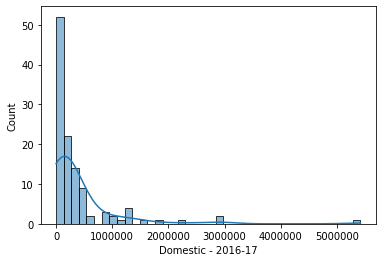

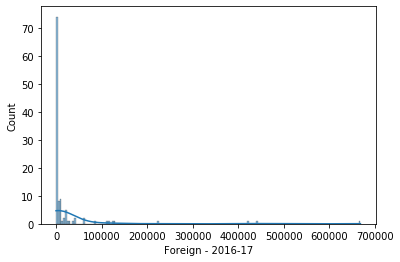

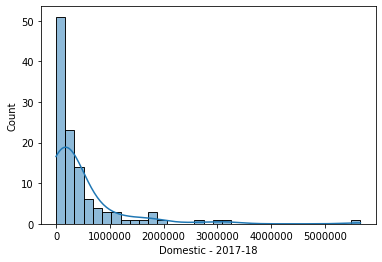

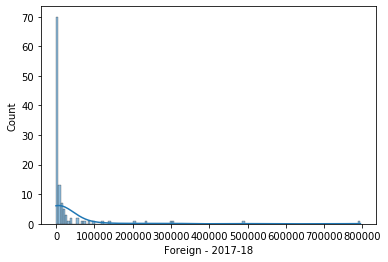

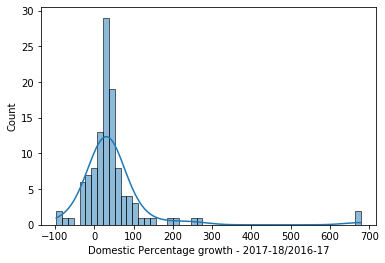

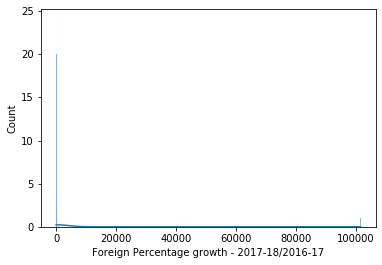

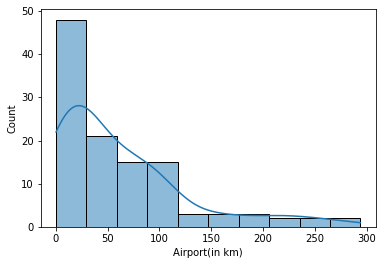

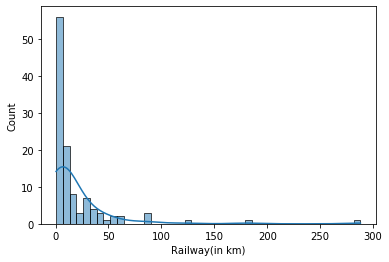

In [27]:
for i in num_data:
    sns.histplot(travellerwise[i], kde=True)
    plt.xlabel(i)
    plt.show()

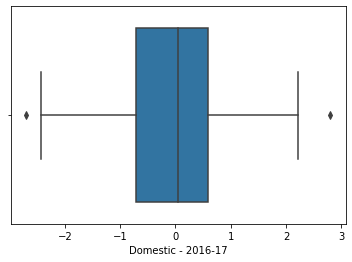

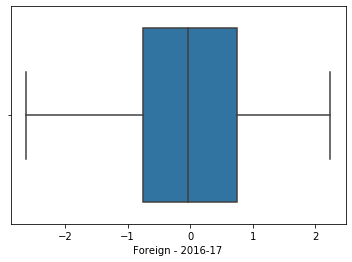

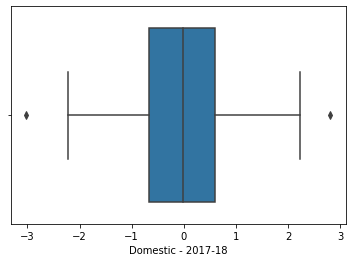

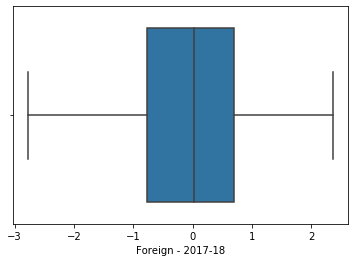

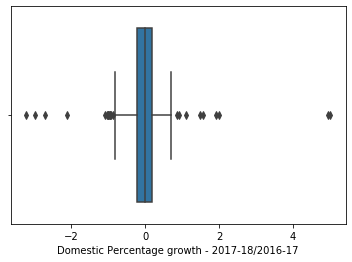

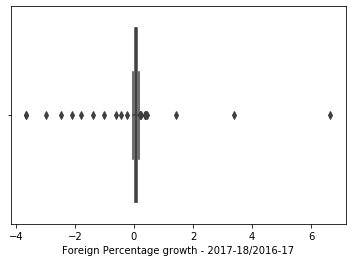

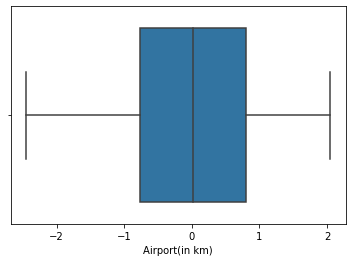

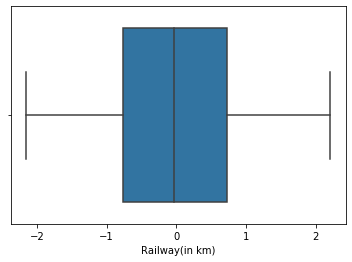

In [28]:
for i in num_data:
    sns.boxplot(x=df[i])
    plt.xlabel(i)
    plt.show()

## SEGMENTATION

## Hierarchical Clustering

In [29]:
import scipy.cluster.hierarchy as shc
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.cluster import AgglomerativeClustering

In [30]:
df = pd.read_csv("Tourism.csv")
df.head()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,5419608,668403,5663136,794556,4.5,18.9,12.0,6.9
1,Agra Circle,Agra Fort,1799953,441326,2008208,489822,11.6,11.0,11.0,5.0
2,Agra Circle,Akbar's Tomb Sikandara,418502,22389,362070,23638,-13.5,5.6,13.0,12.0
3,Agra Circle,Fatehpur Sikri,427854,126114,962069,301181,124.9,138.8,35.0,37.0
4,Agra Circle,Itimad-ud-Daulah,108392,129177,138524,76572,27.8,-40.7,15.0,9.0


In [31]:
df_min_max_scaled = df.copy()
for column in df_min_max_scaled.columns[2:]:
    scaler = StandardScaler()
    scaler.fit(df[[column]])
    df[column] = scaler.transform(df[[column]])

In [32]:
df.head()

,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,Taj Mahal,7.118714,7.357760,6.745049,7.744016,-0.436956,-0.128115,-0.778217,-0.336311
1,Agra Circle,Agra Fort,1.996505,4.757285,2.003416,4.651198,-0.365809,-0.128914,-0.793749,-0.388840
2,Agra Circle,Akbar's Tomb Sikandara,0.041600,-0.040361,-0.132162,-0.080214,-0.617329,-0.129460,-0.762686,-0.195314
3,Agra Circle,Fatehpur Sikri,0.054834,1.147493,0.646232,2.736636,0.769539,-0.115993,-0.421002,0.495849
4,Agra Circle,Itimad-ud-Daulah,-0.397239,1.182570,-0.422174,0.457026,-0.203473,-0.134141,-0.731624,-0.278254


In [37]:
df=df.dropna()  

In [38]:
x = df.iloc[:,2: ].values

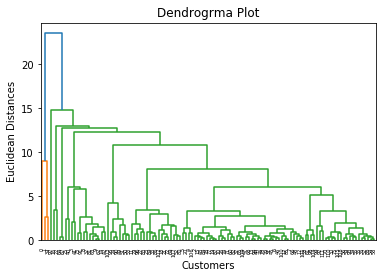

In [42]:
dendro = shc.dendrogram(shc.linkage(x, method="ward"))  
plt.title("Dendrogrma Plot")
plt.ylabel("Euclidean Distances")  
plt.xlabel("Customers")  
plt.show()

In [43]:
hc= AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
y_pred= hc.fit_predict(x)

In [44]:
df['clusters'] = y_pred

In [45]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]

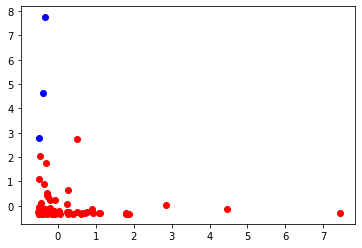

In [49]:
plt.scatter(df1['Railway(in km)'],df1['Foreign - 2017-18'],c='red')
plt.scatter(df2['Railway(in km)'],df2['Foreign - 2017-18'],c='blue')

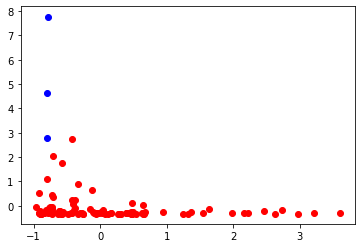

In [50]:
plt.scatter(df1['Airport(in km)'],df1['Foreign - 2017-18'],c='red')
plt.scatter(df2['Airport(in km)'],df2['Foreign - 2017-18'],c='blue')

## K-Means Clusterning

In [52]:
df2 = pd.read_csv('Tourism.csv')

In [53]:
df2 = df2.drop('Name of the Monument',axis=1)

In [54]:
df2.head()

,Circle,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km)
0,Agra Circle,5419608,668403,5663136,794556,4.5,18.9,12.0,6.9
1,Agra Circle,1799953,441326,2008208,489822,11.6,11.0,11.0,5.0
2,Agra Circle,418502,22389,362070,23638,-13.5,5.6,13.0,12.0
3,Agra Circle,427854,126114,962069,301181,124.9,138.8,35.0,37.0
4,Agra Circle,108392,129177,138524,76572,27.8,-40.7,15.0,9.0


In [55]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,PowerTransformer,RobustScaler

pt=PowerTransformer()
#features = ["Domestic - 2016-17", "Foreign - 2016-17","Domestic - 2017-18", "Foreign - 2017-18"]

features = ["Domestic - 2017-18", "Foreign - 2017-18"]

X_subset = df2[features] 
scaler = PowerTransformer().fit(X_subset)
X = scaler.transform(X_subset)
pd.DataFrame(X, columns=X_subset.columns).describe()

,Domestic - 2017-18,Foreign - 2017-18
count,1.150000e+02,1.150000e+02
mean,2.268717e-16,-4.344351e-18
std,1.004376e+00,1.004376e+00
min,-2.987501e+00,-2.461385e+00
25%,-6.940941e-01,-7.411805e-01
50%,-2.809050e-02,3.596692e-02
75%,5.812596e-01,6.909594e-01
max,2.892847e+00,2.421597e+00


C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



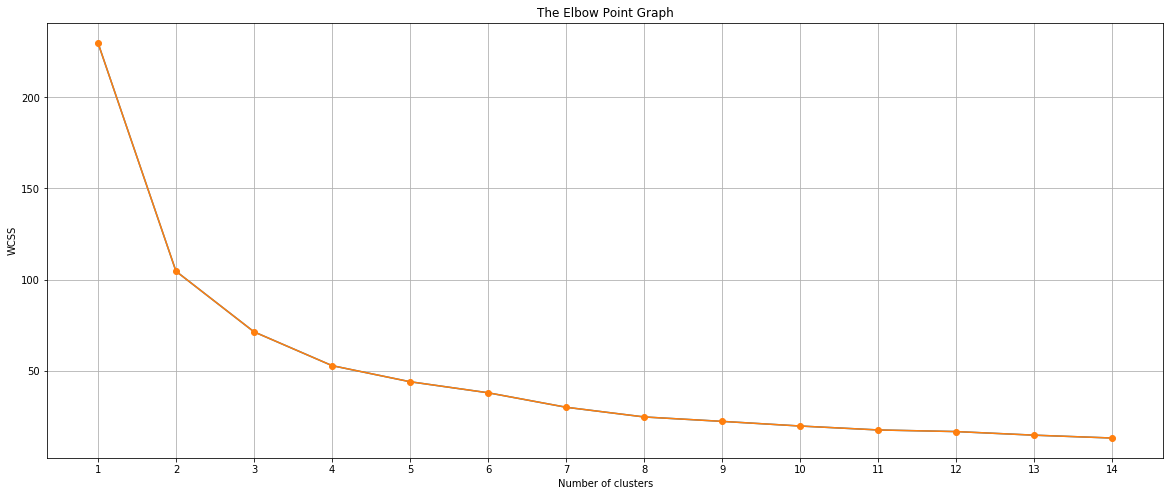

In [56]:
from sklearn.cluster import KMeans
wcss = []  # Within-Cluster-Sum-of-Squares
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(20, 8))
plt.plot(range(1, 15), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.plot(range(1, 15), wcss, "-o")
plt.xticks(range(1, 15))
plt.grid(True)
plt.show()

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.



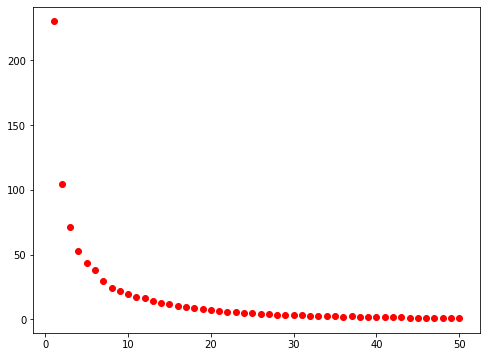

The best K suggest:  8


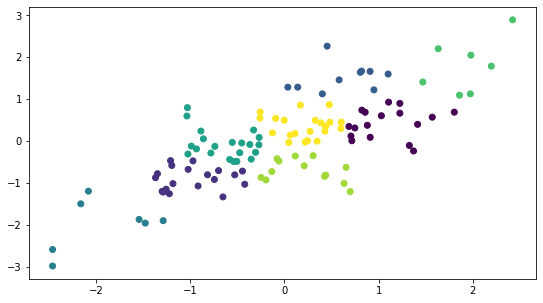

In [58]:
from sklearn.cluster import KMeans
wcss = [] 
cl=50
corte = 0.1
anterior = 100000000000000
cost = []
K_best = cl

for k in range(1,cl+1):
    model = KMeans(n_clusters=k, init='k-means++',n_init=10,max_iter=300,tol=1e-04,random_state=10)
    model=model.fit(X)
    labels=model.labels_
    interia=model.inertia_
    if (K_best == cl) and (((anterior - interia)/anterior) < corte):
        K_best = k - 1
    cost.append(interia)
    anterior = interia

plt.figure(figsize=(8, 6))
plt.scatter(range(1, cl+1), cost, c='red')
plt.show()

print('The best K suggest: ', K_best)
model = KMeans(n_clusters=K_best, init='k-means++', n_init=10,
               max_iter=300, tol=1e-04, random_state=101)

model = model.fit(X)
labels = model.labels_

fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(121)
plt.scatter(x=X[:, 1], y=X[:, 0], c=model.labels_.astype(float))


K equal to 3 -> observed low rates of gain in the decay of the distortions with the decrease of K reaching the limit of 10 % with the K equal to 9.
Silhouette analysis on K-Means clustering

In [59]:
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

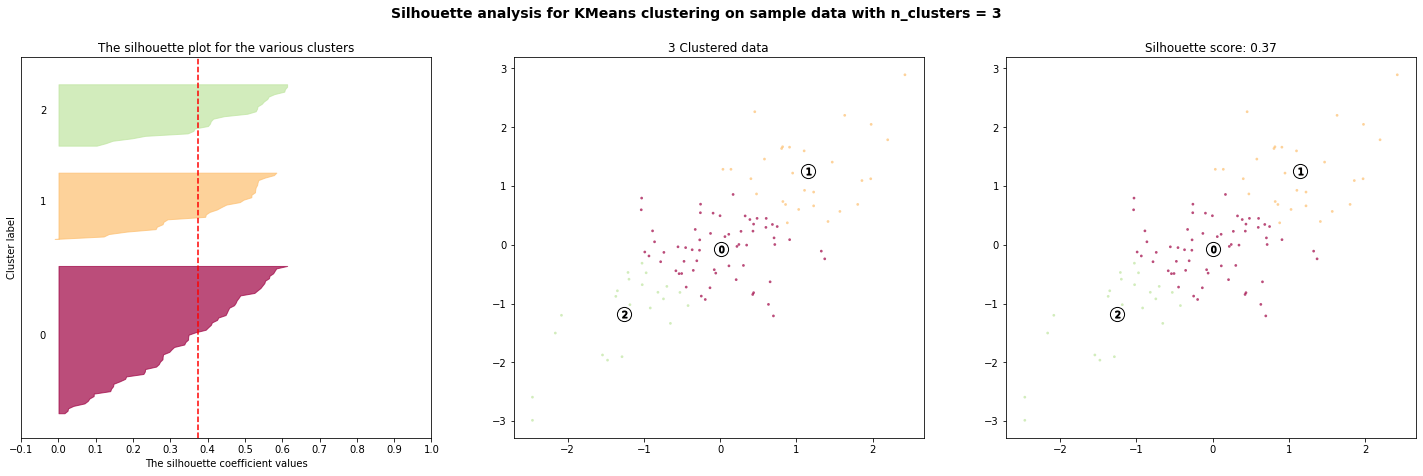

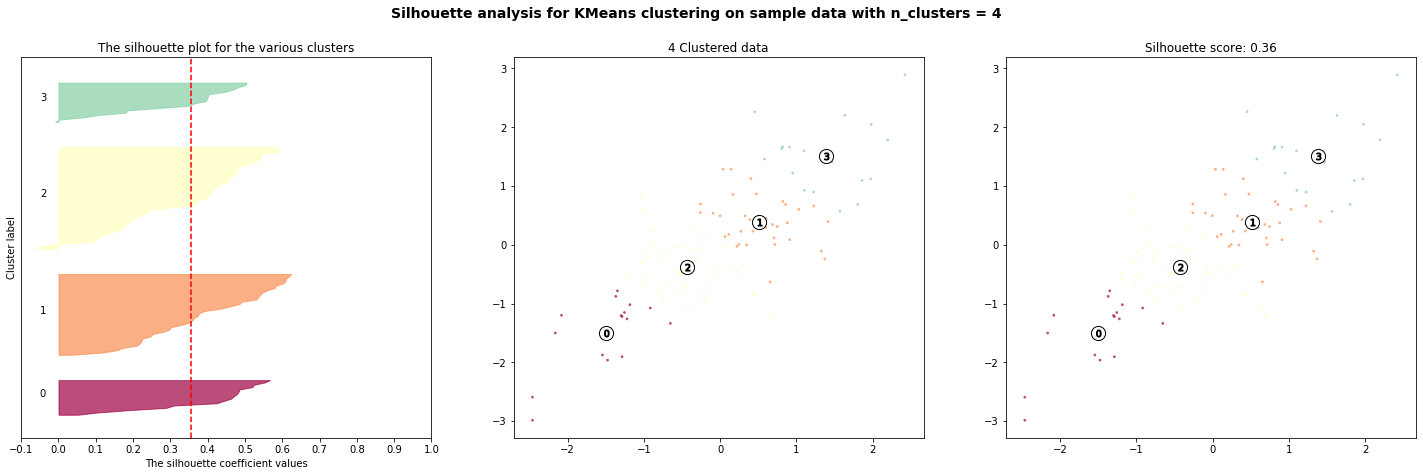

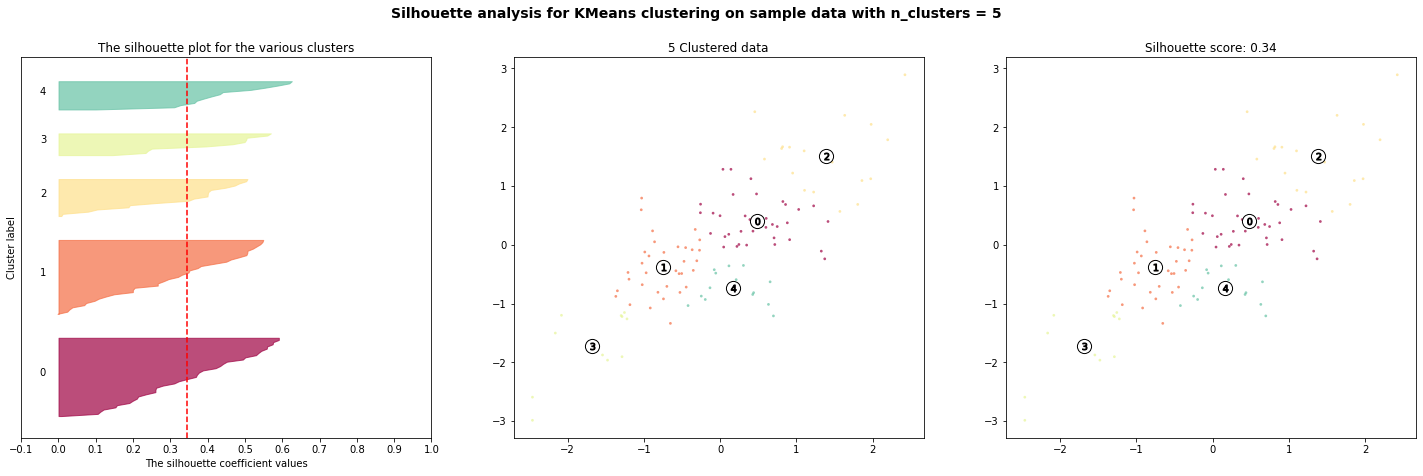

In [60]:
cluster_centers = dict()
K_best=6
for n_clusters in range(3,K_best):
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
    fig.set_size_inches(25, 7)
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, init='k-means++', n_init=10,max_iter=300, tol=1e-04, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    silhouette_avg = silhouette_score(X = X, labels = cluster_labels)
    cluster_centers.update({n_clusters :{'cluster_center':clusterer.cluster_centers_,
                                         'silhouette_score':silhouette_avg,
                                         'labels':cluster_labels}
                           })

    sample_silhouette_values = silhouette_samples(X = X, labels = cluster_labels)
    y_lower = 10
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.Spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    ax1.set_yticks([])
    ax1.set_xticks([-0.1, 0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1])
    colors = cm.Spectral(cluster_labels.astype(float) / n_clusters)
    
    centers = clusterer.cluster_centers_
    y = 0
    x = 1
    ax2.scatter(X[:, x], X[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax2.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax2.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax2.set_title("{} Clustered data".format(n_clusters))
    

    x = 1
    ax3.scatter(X[:, x], X[:, y], marker='.', s=30, lw=0, alpha=0.7, c=colors, edgecolor='k')   
    ax3.scatter(centers[:, x], centers[:, y], marker='o', c="white", alpha=1, s=200, edgecolor='k')
    for i, c in enumerate(centers):
        ax3.scatter(c[x], c[y], marker='$%d$' % i, alpha=1, s=50, edgecolor='k')
    ax3.set_title("Silhouette score: {:1.2f}".format(cluster_centers[n_clusters]['silhouette_score']))
    
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()

In [61]:
for i in range(3, K_best+1, 2):
    print("for {} clusters the silhouette score is {:1.3f}".format(
        i, cluster_centers[i]['silhouette_score']))
    print("Centers of each cluster:")
    cent_transformed = scaler.inverse_transform(
        cluster_centers[i]['cluster_center'])
    print(pd.DataFrame(cent_transformed, columns=features))
    print('-'*50)

for 3 clusters the silhouette score is 0.373
Centers of each cluster:
   Domestic - 2017-18  Foreign - 2017-18
0        1.835312e+05        2507.790912
1        1.123535e+06       45210.111184
2        1.996400e+04          62.049191
--------------------------------------------------
for 5 clusters the silhouette score is 0.344
Centers of each cluster:
   Domestic - 2017-18  Foreign - 2017-18
0        3.791865e+05        8656.375981
1        1.100532e+05         290.429898
2        1.492352e+06       78401.014487
3        4.380699e+03          14.619562
4        5.468655e+04        3834.878442
--------------------------------------------------


,Circle,Name of the Monument,Domestic - 2016-17,Foreign - 2016-17,Domestic - 2017-18,Foreign - 2017-18,Domestic Percentage growth - 2017-18/2016-17,Foreign Percentage growth - 2017-18/2016-17,Airport(in km),Railway(in km),clusters
0,Agra Circle,Taj Mahal,7.118714,7.357760,6.745049,7.744016,-0.436956,-0.128115,-0.778217,-0.336311,1
1,Agra Circle,Agra Fort,1.996505,4.757285,2.003416,4.651198,-0.365809,-0.128914,-0.793749,-0.388840,1
2,Agra Circle,Akbar's Tomb Sikandara,0.041600,-0.040361,-0.132162,-0.080214,-0.617329,-0.129460,-0.762686,-0.195314,0
3,Agra Circle,Fatehpur Sikri,0.054834,1.147493,0.646232,2.736636,0.769539,-0.115993,-0.421002,0.495849,0
4,Agra Circle,Itimad-ud-Daulah,-0.397239,1.182570,-0.422174,0.457026,-0.203473,-0.134141,-0.731624,-0.278254,0


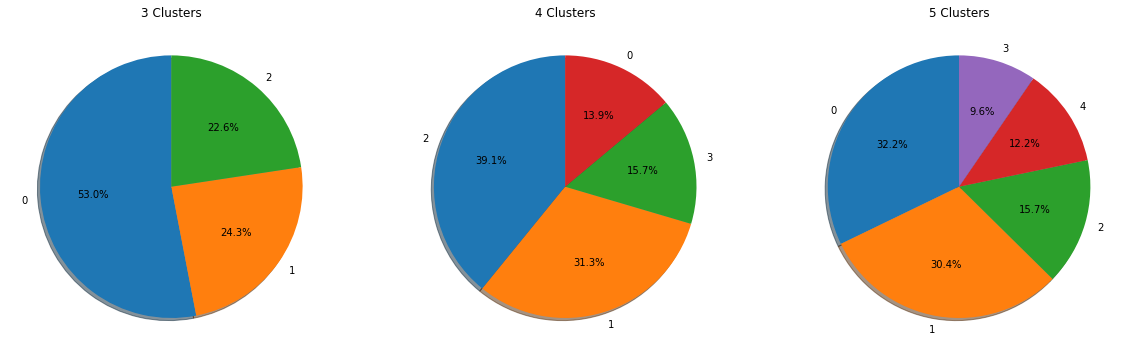

In [63]:
df2['clusters_3'] = cluster_centers[3]['labels']
df2['clusters_4'] = cluster_centers[4]['labels']

df2['clusters_5'] = cluster_centers[5]['labels']
display(df.head())

fig = plt.figure(figsize=(20, 7))
f1 = fig.add_subplot(131)
market = df2.clusters_3.value_counts()
g = plt.pie(market, labels=market.index,
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('3 Clusters')


f1 = fig.add_subplot(132)
market = df2.clusters_4.value_counts()
g = plt.pie(market, labels=market.index,
            autopct='%1.1f%%', shadow=True, startangle=90)        
plt.title('4 Clusters')


f1 = fig.add_subplot(133)
market = df2.clusters_5.value_counts()
g = plt.pie(market, labels=market.index,
            autopct='%1.1f%%', shadow=True, startangle=90)
plt.title('5 Clusters')
plt.show()

Text(0.5, 1.0, '4 Clusters')

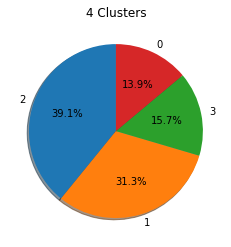

In [65]:
market = df2.clusters_4.value_counts()
g = plt.pie(market, labels=market.index,
            autopct='%2.1f%%', shadow=True, startangle=90)
plt.title('4 Clusters')

In [66]:
clusterer = KMeans(n_clusters=4,init='k-means++',random_state=10).fit(X)
centers = clusterer.cluster_centers_
c_preds = clusterer.predict(X)
print(centers)

[[-1.49791563 -1.50039686]
 [ 0.39538329  0.51309883]
 [-0.38679991 -0.42909021]
 [ 1.50771377  1.38021396]]


['green', 'green', 'blue', 'green', 'blue', 'blue', 'blue', 'purple', 'green', 'green']


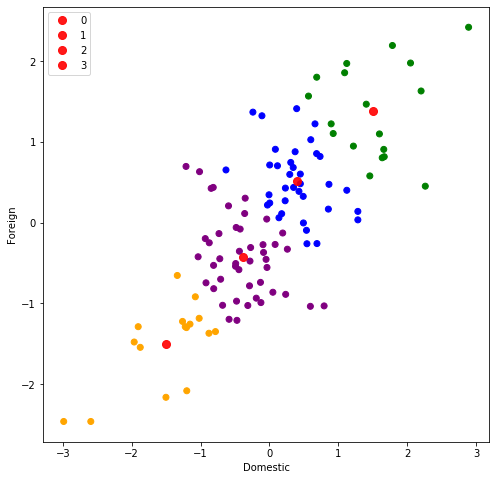

In [67]:
import matplotlib
fig = plt.figure(figsize=(8, 8))
colors = ['orange', 'blue', 'purple', 'green']
colored = [colors[k] for k in c_preds]
print(colored[0:10])
plt.scatter(X[:, 0], X[:, 1], color=colored)
for ci, c in enumerate(centers):
    plt.plot(c[0], c[1], 'o', markersize=8,
             color='red', alpha=0.9, label=''+str(ci))

plt.xlabel('Domestic')
plt.ylabel('Foreign')
plt.legend()
plt.show()

In [70]:
df2.Circle.value_counts()[0:10]

Delhi Circle          10
Mumbai Circle         10
Agra Circle            8
Hyderabad Circle       8
Chennai Circle         7
Bhopal Circle          7
Dharwad Circle         6
Vadodara Circle        6
Aurangabad Circle      6
Bhubaneswar Circle     5
Name: Circle, dtype: int64

In [71]:
data=pd.DataFrame()

data['Circle']=df2.Circle.copy()
data=pd.get_dummies(data,columns=['Circle'])

In [72]:
data.insert(0,'Circle',df2['Circle'])

In [73]:
data

,Circle,Circle_Agra Circle,Circle_Aurangabad Circle,Circle_Bengaluru Circle,Circle_Bhopal Circle,Circle_Bhubaneswar Circle,Circle_Chandigarh Circle,Circle_Chennai Circle,Circle_Delhi Circle,Circle_Dharwad Circle,...,Circle_Leh Mini Circle,Circle_Lucknow Circle,Circle_Mumbai Circle,Circle_Patna Circle,Circle_Raipur Circle,Circle_Sarnath Circle,Circle_Shimla Mini Circle,Circle_Srinagar Circle,Circle_Thrissur Circle,Circle_Vadodara Circle
0,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Vadodara Circle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
111,Vadodara Circle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
112,Vadodara Circle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
113,Vadodara Circle,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [74]:
clust_prod = data.copy()
clust_prod['cluster'] = c_preds

clust_prod.head(10)

,Circle,Circle_Agra Circle,Circle_Aurangabad Circle,Circle_Bengaluru Circle,Circle_Bhopal Circle,Circle_Bhubaneswar Circle,Circle_Chandigarh Circle,Circle_Chennai Circle,Circle_Delhi Circle,Circle_Dharwad Circle,...,Circle_Lucknow Circle,Circle_Mumbai Circle,Circle_Patna Circle,Circle_Raipur Circle,Circle_Sarnath Circle,Circle_Shimla Mini Circle,Circle_Srinagar Circle,Circle_Thrissur Circle,Circle_Vadodara Circle,cluster
0,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
2,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
4,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
5,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
6,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,Agra Circle,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,2
8,Aurangabad Circle,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9,Aurangabad Circle,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3


In [75]:
c0 = clust_prod[clust_prod['cluster'] == 0].drop('cluster', axis=1).mean()
c0.sort_values(ascending=False)[0:10]

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Circle_Vadodara Circle      0.1250
Circle_Srinagar Circle      0.1250
Circle_Chennai Circle       0.1250
Circle_Delhi Circle         0.1250
Circle_Hyderabad Circle     0.1250
Circle_Lucknow Circle       0.0625
Circle_Bhopal Circle        0.0625
Circle_Sarnath Circle       0.0625
Circle_Guwahati Circle      0.0625
Circle_Hampi Mini Circle    0.0625
dtype: float64

In [76]:
c1 = clust_prod[clust_prod['cluster'] == 1].drop('cluster', axis=1).mean()
c1.sort_values(ascending=False)[0:10]

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Circle_Dharwad Circle       0.138889
Circle_Agra Circle          0.111111
Circle_Bhopal Circle        0.111111
Circle_Mumbai Circle        0.111111
Circle_Bengaluru Circle     0.083333
Circle_Lucknow Circle       0.055556
Circle_Jodhpur Circle       0.055556
Circle_Aurangabad Circle    0.055556
Circle_Vadodara Circle      0.055556
Circle_Delhi Circle         0.055556
dtype: float64

In [77]:
c2 = clust_prod[clust_prod['cluster'] == 2].drop('cluster', axis=1).mean()
c2.sort_values(ascending=False)[0:10]

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Circle_Hyderabad Circle      0.088889
Circle_Mumbai Circle         0.088889
Circle_Guwahati Circle       0.088889
Circle_Patna Circle          0.066667
Circle_Bhubaneswar Circle    0.066667
Circle_Chennai Circle        0.066667
Circle_Delhi Circle          0.066667
Circle_Vadodara Circle       0.044444
Circle_Kolkata Circle        0.044444
Circle_Aurangabad Circle     0.044444
dtype: float64

In [78]:
c3 = clust_prod[clust_prod['cluster'] == 3].drop('cluster', axis=1).mean()
c3.sort_values(ascending=False)[0:10]

C:\Users\Dell\anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



Circle_Agra Circle           0.166667
Circle_Delhi Circle          0.166667
Circle_Hyderabad Circle      0.111111
Circle_Aurangabad Circle     0.111111
Circle_Bengaluru Circle      0.055556
Circle_Thrissur Circle       0.055556
Circle_Bhubaneswar Circle    0.055556
Circle_Chennai Circle        0.055556
Circle_Sarnath Circle        0.055556
Circle_Hampi Mini Circle     0.055556
dtype: float64

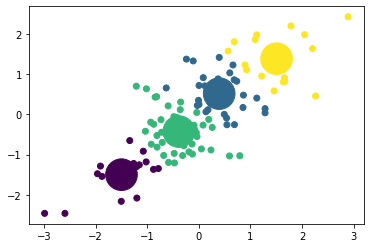

In [79]:
centroids=clusterer.cluster_centers_
plt.scatter(X[:,0], X[:,1], c=c_preds)
plt.scatter(centroids[:, 0], centroids[:, 1],
            c=range(centroids.shape[0]), s=1000)

In [80]:

from scipy.spatial import distance_matrix

dist_mat = pd.DataFrame(distance_matrix(X, centroids))

dist_mat.groupby(c_preds).mean()

,0,1,2,3
0,0.678943,2.783230,1.579199,4.175453
1,2.803146,0.510383,1.309192,1.492366
2,1.625812,1.341509,0.568743,2.676501
3,4.199277,1.520784,2.678040,0.736140
